In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import keras_tuner as kt
from keras_tuner import RandomSearch
from tensorflow import keras

In [4]:
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

def load_data(data_folder):
    reviews = []
    labels = []
    
    for label in ['pos', 'neg']:
        folder_path = os.path.join(data_folder, label)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                review = file.read()
                reviews.append(review)
                labels.append(1 if label == 'pos' else 0)
    
    return reviews, labels


In [5]:
# Load and preprocess data
data_folder_train = 'D:\\jaysh\\FALL2023\\DLRL\\HW3\\dataset\\train'  # Replace with the actual path to your dataset
data_folder_test = 'D:\\jaysh\\FALL2023\\DLRL\\HW3\\dataset\\test'  # Replace with the actual path to your dataset


In [6]:
X_train, y_train = load_data(data_folder_train)
X_test, y_test = load_data(data_folder_test)

from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert to numpy arrays
y_train, y_test = np.array(y_train), np.array(y_test)

X_train = X_train_tfidf.toarray()
X_test = X_test_tfidf.toarray()


In [7]:
def build_model20(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=20))
    model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_model50(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=50))
    model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_model100(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=100))
    model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_model200(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=200))
    model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_model500(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=500))
    model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

# Hyperparameter tuning for state dimensions = 20

## batchsize 32

In [8]:
#20 state dimensions batch_size 32
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 32
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model20,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 00m 48s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 21s


Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.01
Score: 1.0

Trial 1 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 0.5

********************************************************************************



## batchsize 64

In [9]:
#20 state dimensions batch_size 64
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 64
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model20,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")


Trial 3 Complete [00h 00m 31s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 33s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.01
Score: 0.5

********************************************************************************



## batch size 96

In [10]:
#20 state dimensions batch_size 96
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 96
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model20,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")


Trial 3 Complete [00h 00m 30s]
val_accuracy: 0.5

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 23s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.5

Trial 2 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.01
Score: 0.5

********************************************************************************



# State dimensions 50

## batch size 32

In [11]:
#50 state dimensions batch_size 32
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 32
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model50,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 01m 10s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 03m 39s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.001
Score: 0.5

Trial 1 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 0.5

********************************************************************************



## batch size 64

In [12]:
#50 state dimensions batch_size 64
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 64
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model50,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 01m 04s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5
Total elapsed time: 00h 02m 54s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 0.5

Trial 0 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.0

Trial 1 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 0.0

********************************************************************************



## batch size 96

In [13]:
#50 state dimensions batch_size 96
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 96
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model50,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 00m 53s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 42s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 1.0

Trial 1 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.01
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.0001
Score: 1.0

********************************************************************************



# State dimensions 100

## batch size 32

In [14]:
#100 state dimensions batch_size 32
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 32
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model100,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 02m 11s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 06m 24s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.0001
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.5

********************************************************************************



## batch size 64

In [15]:
#100 state dimensions batch_size 64
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 64
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model100,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 01m 38s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 04m 52s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 1.0

Trial 1 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 1.0

********************************************************************************



## batch size 96

In [16]:
#100 state dimensions batch_size 96
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 96
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model100,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 01m 31s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 05m 00s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 0.5

Trial 1 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.01
Score: 0.5

********************************************************************************



# State dimensions 200

## batch size 32

In [17]:
#200 state dimensions batch_size 32
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 32
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model200,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 04m 19s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 11m 02s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.0001
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 1.0

Trial 1 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.5

********************************************************************************



## batch size 64

In [18]:
#200 state dimensions batch_size 64
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 64
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model200,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 03m 21s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 10m 17s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.001
Score: 1.0

Trial 1 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 1.0

********************************************************************************



## batch size 96

In [19]:
#200 state dimensions batch_size 96
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 96
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model200,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 02m 58s]
val_accuracy: 0.5

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 10m 11s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.5

Trial 2 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 0.5

********************************************************************************



# State dimensions 500

## batch size 32

In [20]:
#500 state dimensions batch_size 32
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 32
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model500,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 13m 56s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 32m 13s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 1.0

Trial 1 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 1.0

********************************************************************************



## batch size 64

In [21]:
#500 state dimensions batch_size 64
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 64
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model500,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 11m 08s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 38m 43s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 1.0

Trial 1 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.01
Score: 1.0

********************************************************************************



## batch size 96

In [22]:
#500 state dimensions batch_size 96
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 96
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_model500,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 19m 25s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5
Total elapsed time: 00h 58m 34s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.001
Score: 0.5

Trial 1 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.5

Trial 2 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 0.5

********************************************************************************



# Selecting the best models and getting the results

## Dimension 20

In [23]:
acc=[]

X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 64
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=20))
model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = 0.5))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X20_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acc.append(score[1])

Epoch 1/3
390/390 [==============================] - 8s 17ms/step - loss: 0.6956 - accuracy: 0.5005 - val_loss: 0.6782 - val_accuracy: 1.0000
Epoch 2/3
390/390 [==============================] - 5s 14ms/step - loss: 0.6938 - accuracy: 0.5050 - val_loss: 0.7139 - val_accuracy: 0.0000e+00
Epoch 3/3
390/390 [==============================] - 5s 13ms/step - loss: 0.6941 - accuracy: 0.4944 - val_loss: 0.7045 - val_accuracy: 0.0000e+00
Testing Accuracy: 0.5


## Dimension 50

In [24]:
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 96
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=50))
model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = 0.5))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X50_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acc.append(score[1])

Epoch 1/3
260/260 [==============================] - 9s 28ms/step - loss: 0.6972 - accuracy: 0.4966 - val_loss: 0.7259 - val_accuracy: 0.0000e+00
Epoch 2/3
260/260 [==============================] - 7s 26ms/step - loss: 0.6993 - accuracy: 0.5031 - val_loss: 0.6281 - val_accuracy: 1.0000
Epoch 3/3
260/260 [==============================] - 7s 26ms/step - loss: 0.6961 - accuracy: 0.5029 - val_loss: 0.6466 - val_accuracy: 1.0000
Testing Accuracy: 0.5


## Dimension 100

In [25]:
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 32
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=100))
model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = 0.6))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.0001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X100_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acc.append(score[1])

Epoch 1/3
781/781 [==============================] - 20s 24ms/step - loss: 0.7000 - accuracy: 0.5087 - val_loss: 0.6815 - val_accuracy: 1.0000
Epoch 2/3
781/781 [==============================] - 18s 24ms/step - loss: 0.6969 - accuracy: 0.4996 - val_loss: 0.5585 - val_accuracy: 1.0000
Epoch 3/3
781/781 [==============================] - 18s 23ms/step - loss: 0.6957 - accuracy: 0.4995 - val_loss: 0.8248 - val_accuracy: 0.0000e+00
Testing Accuracy: 0.5


## Dimension 200

In [26]:
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 32
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=200))
model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = 0.6))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.0001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X200_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acc.append(score[1])

Epoch 1/3
781/781 [==============================] - 34s 42ms/step - loss: 0.6995 - accuracy: 0.4976 - val_loss: 0.6083 - val_accuracy: 1.0000
Epoch 2/3
781/781 [==============================] - 32s 41ms/step - loss: 0.6967 - accuracy: 0.4990 - val_loss: 0.6698 - val_accuracy: 1.0000
Epoch 3/3
781/781 [==============================] - 32s 41ms/step - loss: 0.6953 - accuracy: 0.4992 - val_loss: 0.7646 - val_accuracy: 0.0000e+00
Testing Accuracy: 0.5


## Dimension 500

In [27]:
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 32
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=500))
model.add(SimpleRNN(units=128, input_shape=(None, 1), dropout = 0.0))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.0001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X500_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acc.append(score[1])

Epoch 1/3
781/781 [==============================] - 72s 90ms/step - loss: 0.6986 - accuracy: 0.4975 - val_loss: 0.8283 - val_accuracy: 0.0000e+00
Epoch 2/3
781/781 [==============================] - 70s 89ms/step - loss: 0.6980 - accuracy: 0.4970 - val_loss: 0.8360 - val_accuracy: 0.0000e+00
Epoch 3/3
781/781 [==============================] - 69s 89ms/step - loss: 0.6975 - accuracy: 0.4992 - val_loss: 0.6537 - val_accuracy: 1.0000
Testing Accuracy: 0.5


In [28]:
simplernnacc = ""
for i in acc:
    simplernnacc += str(i) + " "

In [29]:
simplernnacc

'0.5 0.5 0.5 0.5 0.5 '

In [30]:
with open("simplernnacc.txt", "w") as f:
    f.write(simplernnacc)

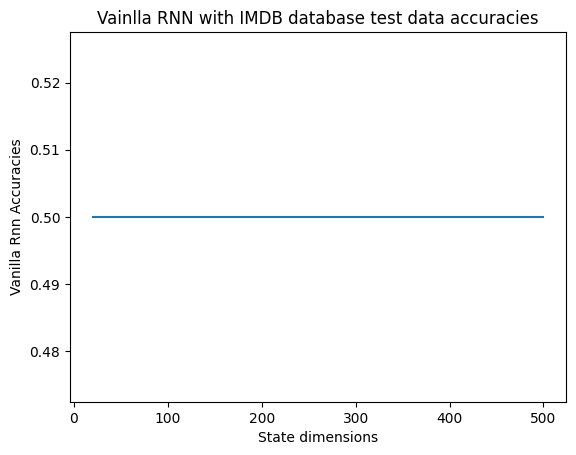

In [31]:
dimensions = [20,50,100,200,500]
plt.plot(dimensions, acc)
plt.ylabel('Vanilla Rnn Accuracies')
plt.xlabel('State dimensions')
plt.title('Vainlla RNN with IMDB database test data accuracies')
plt.show()


# LSTM


## Hyperparameter tuning

In [32]:
def build_modellstm20(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=20))
    model.add(LSTM(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_modellstm50(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=50))
    model.add(LSTM(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_modellstm100(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=100))
    model.add(LSTM(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_modellstm200(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=200))
    model.add(LSTM(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

def build_modellstm500(hp):
    vocab_size = 5000
    embedding_size = 128
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=500))
    model.add(LSTM(units=128, input_shape=(None, 1), dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())

    model.compile(loss='binary_crossentropy', 
                 optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), 
                 metrics=['accuracy'])
    return model

# Hyperparameter tuning for state dimensions = 20

## batchsize 32

In [33]:
#20 state dimensions batch_size 32
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 32
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm20,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 02m 08s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 06m 31s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.01
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 0.5

********************************************************************************



## batchsize 64

In [34]:
#20 state dimensions batch_size 64
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 64
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm20,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")


Trial 3 Complete [00h 01m 58s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 05m 58s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.01
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 0.5

********************************************************************************



## batch size 96

In [35]:
#20 state dimensions batch_size 96
X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 96
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm20,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")


Trial 3 Complete [00h 01m 42s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 05m 16s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.0001
Score: 0.5

Trial 1 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 0.5

********************************************************************************



# State dimensions 50

## batch size 32

In [36]:
#50 state dimensions batch_size 32
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 32
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm50,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 03m 47s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 11m 07s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 1.0

Trial 1 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 0.5

********************************************************************************



## batch size 64

In [37]:
#50 state dimensions batch_size 64
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 64
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm50,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 04m 39s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 14m 40s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.0001
Score: 1.0

Trial 1 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.01
Score: 0.5

********************************************************************************



## batch size 96

In [38]:
#50 state dimensions batch_size 96
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 96
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm50,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 03m 28s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 11m 27s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 0.5

Trial 1 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.001
Score: 0.5

********************************************************************************



# State dimensions 100

## batch size 32

In [39]:
#100 state dimensions batch_size 32
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 32
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm100,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 07m 31s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 21m 15s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.001
Score: 0.5

Trial 1 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 0.5

********************************************************************************



## batch size 64

In [40]:
#100 state dimensions batch_size 64
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 64
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm100,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 09m 42s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 29m 51s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.001
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.0001
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.01
Score: 0.5

********************************************************************************



## batch size 96

In [41]:
#100 state dimensions batch_size 96
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 96
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm100,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 08m 22s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 23m 43s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
dropout: 0.0
learning_rate: 0.001
Score: 1.0

Trial 0 summary
Hyperparameters:
dropout: 0.5
learning_rate: 0.0001
Score: 0.5

Trial 1 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.001
Score: 0.5

********************************************************************************



# State dimensions 200

## batch size 32

In [42]:
#200 state dimensions batch_size 32
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 32
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm200,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 3 Complete [00h 12m 46s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 40m 06s
Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.001
Score: 1.0

Trial 2 summary
Hyperparameters:
dropout: 0.6
learning_rate: 0.001
Score: 1.0

Trial 1 summary
Hyperparameters:
dropout: 0.4
learning_rate: 0.0001
Score: 0.5

********************************************************************************



## batch size 64

In [43]:
#200 state dimensions batch_size 64
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 64
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm200,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



Trial 2 Complete [00h 39m 27s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 01h 21m 44s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
0.5               |0                 |dropout
0.0001            |0.01              |learning_rate

Epoch 1/3
390/390 [==============================] - 386s 983ms/step - loss: 0.6934 - accuracy: 0.4998 - val_loss: 0.6970 - val_accuracy: 0.0000e+00
Epoch 2/3
390/390 [==============================] - 372s 955ms/step - loss: 0.6933 - accuracy: 0.4965 - val_loss: 0.6947 - val_accuracy: 0.0000e+00
Epoch 3/3
390/390 [==============================] - 415s 1s/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6848 - val_accuracy: 1.0000
Epoch 1/3
105/390 [=======>......................] - ETA: 4:44 - loss: 0.6933 - accuracy: 0.4927

KeyboardInterrupt: 

## batch size 96

In [ ]:
#200 state dimensions batch_size 96
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 96
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm200,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



# State dimensions 500

## batch size 32

In [ ]:
#500 state dimensions batch_size 32
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 32
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm500,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



## batch size 64

In [ ]:
#500 state dimensions batch_size 64
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 64
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm500,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



## batch size 96

In [ ]:
#500 state dimensions batch_size 96
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 96
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]
tuner = RandomSearch(
    build_modellstm500,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search(X_train2, y_train2, epochs=3, validation_data=(X_valid, y_valid), batch_size = bsize)
tuner.results_summary()
print("\n********************************************************************************\n")



# Selecting the best models and getting the results

## Dimension 20

In [ ]:
acclstm=[]

X20_train = sequence.pad_sequences(X_train, maxlen=20)
X20_test = sequence.pad_sequences(X_test, maxlen=20)
bsize = 96
X_valid, y_valid = X20_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X20_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=20))
model.add(LSTM(units=128, input_shape=(None, 1), dropout = 0.4))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X20_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])

In [ ]:
acclstm.append(score[1])

## Dimension 50

In [ ]:
X50_train = sequence.pad_sequences(X_train, maxlen=50)
X50_test = sequence.pad_sequences(X_test, maxlen=50)
bsize = 64
X_valid, y_valid = X50_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X50_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=50))
model.add(LSTM(units=128, input_shape=(None, 1), dropout = 0.4))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.01), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X50_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])


In [ ]:
acclstm[1] = (score[1]) 

## Dimension 100

In [ ]:
X100_train = sequence.pad_sequences(X_train, maxlen=100)
X100_test = sequence.pad_sequences(X_test, maxlen=100)
bsize = 32
X_valid, y_valid = X100_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X100_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=100))
model.add(LSTM(units=128, input_shape=(None, 1), dropout = 0.6))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.0001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X100_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])


In [ ]:
acclstm.append(score[1])

## Dimension 200

In [ ]:
X200_train = sequence.pad_sequences(X_train, maxlen=200)
X200_test = sequence.pad_sequences(X_test, maxlen=200)
bsize = 32
X_valid, y_valid = X200_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X200_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=200))
model.add(LSTM(units=128, input_shape=(None, 1), dropout = 0.4))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.01), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X200_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acclstm.append(score[1])

## Dimension 500

In [ ]:
X500_train = sequence.pad_sequences(X_train, maxlen=500)
X500_test = sequence.pad_sequences(X_test, maxlen=500)
bsize = 32
X_valid, y_valid = X500_train[:bsize], y_train[:bsize]
X_train2, y_train2 = X500_train[bsize:], y_train[bsize:]

vocab_size = 5000
embedding_size = 128
num_epochs = 3
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=500))
model.add(LSTM(units=128, input_shape=(None, 1), dropout = 0.4))
model.add(Dense(1, activation='sigmoid'))
#print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.Adam(lr=0.0001), 
             metrics=['accuracy'])
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=bsize, epochs=num_epochs)
score = model.evaluate(X500_test, y_test, verbose=0)
print('Testing Accuracy:', score[1])
acclstm.append(score[1])

In [ ]:
lstmacc = ""
for i in acclstm:
    lstmacc += str(i) + " "

In [ ]:
lstmacc

In [ ]:
with open("lstmacc.txt", "w") as f:
    f.write(lstmacc)

In [ ]:
dimensions = [20,50,100,200,500]
plt.plot(dimensions, acclstm)
plt.ylabel('LSTM Accuracies')
plt.xlabel('State dimensions')
plt.title('LSTM with IMDB database test data accuracies')
plt.show()

# Combining the Results of LSTM and Vanilla RNN

In [ ]:
%matplotlib notebook
plt.plot(dimensions,acc,color='b',linestyle='solid',label='Vanilla RNN')
plt.plot(dimensions,acclstm,color='g',linestyle='solid',label='LSTM')

plt.title('Model-wise accuracy comparison')
plt.xlabel('State Dimensions')
plt.ylabel('Accuracy')
plt.legend()
plt.show()